In [3]:
%matplotlib inline

Setting k equal to  5
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/home/spineki/miniconda3/envs/fenicsproject/lib/python3.8/site-packages/dolfin/common/plotting.py:152: UserWarning: The following kwargs were not used by contour: 'interactive'
  return ax.tricontourf(mesh2triang(mesh), C, levels, **kwargs)


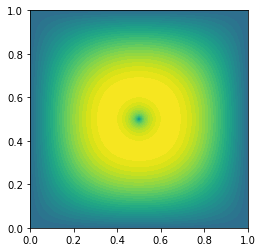

In [12]:
import sys
from dolfin import *

try:
    k = 5
    print ("Setting k equal to ", k)
except IndexError:
    k = 50.0

## Problem data
E0 = Constant(0.0)
n = Constant(1.0)
k = Constant(k)

## Formulation
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "P", 1)

E = TrialFunction(V)
v = TestFunction(V)

# Boundary conditions
point = Point(0.5, 0.5)
f = PointSource(V, point, 1.0)

def E0_boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, E0, E0_boundary)

# Equation
a = ((k**2 / n**2) * inner(E, v) - inner(nabla_grad(E), nabla_grad(v))) * dx
L = Constant(0.0) * v * dx

# Assemble system
A, rhs = assemble_system(a, L, bc)
f.apply(rhs)

# Solve system
E = Function(V)
E_vec = E.vector()
solve(A, E_vec, rhs)

# Plot and export solution
plot(E, interactive=True)

file = File("helmhurts.pvd")
